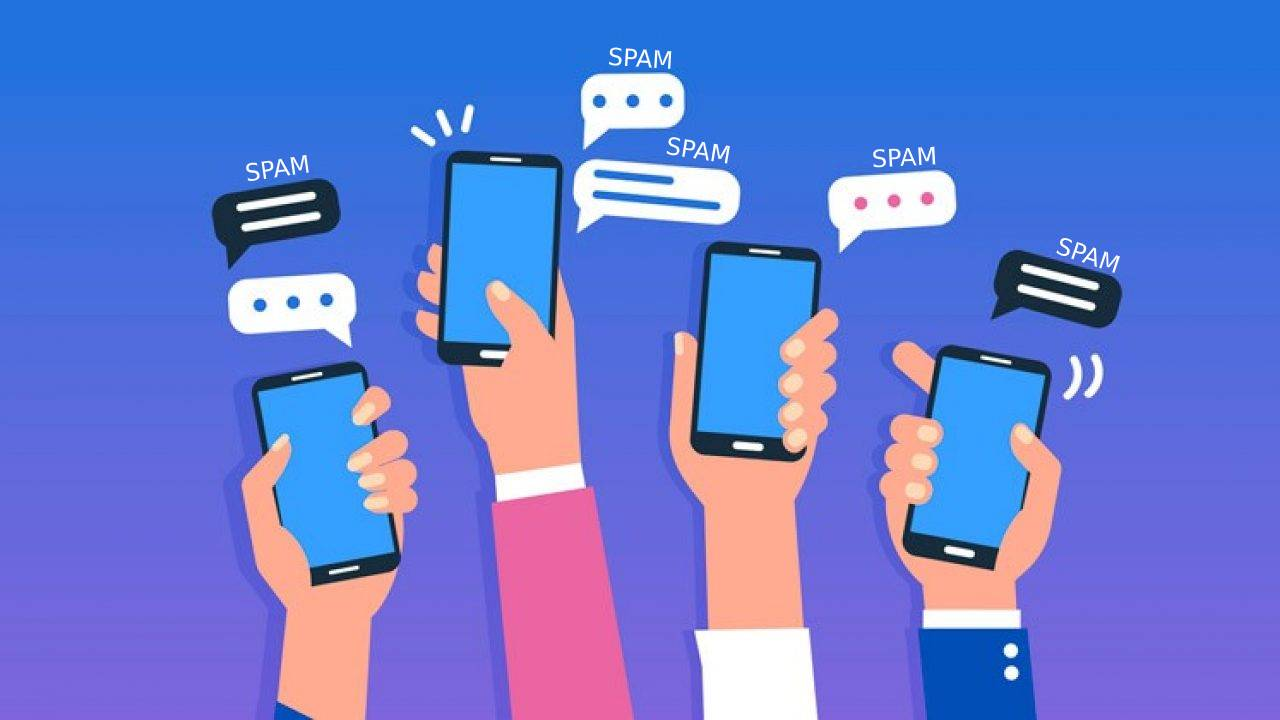

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1)Data loading

In [2]:
sms_df=pd.read_csv(r"C:\Users\DjS\Desktop\datasets\spam.csv", encoding='latin-1')


# 2) Analysing Dataset :-

In [3]:
sms_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
sms_df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
sms_df.shape

(5572, 5)

In [7]:
sms_df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
sms_df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

# 3) Data Preprocessing :-

In [9]:
sms_df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [10]:
sms_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [11]:
# after dropping

sms_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
sms_df.rename(columns={'v1':'target','v2':'sms'},inplace=True)

In [13]:
sms_df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# total number of duplicated records in our dataframe
sms_df.duplicated().sum()

403

In [15]:
sms_df.drop_duplicates(inplace=True)

In [16]:
# after removing duplicate records
sms_df.shape

(5169, 2)

# 4) Exploratory Data Analysis ( EDA ) :-
**Analysing Data using Visualisation plots (graphs )**

In [17]:
# 'target' column contain higher 'ham' sms,
# thus, data seems unbalance

# Total number of 'ham' and 'spam' messages in 'target' column
sms_df['target'].value_counts()

ham     4516
spam     653
Name: target, dtype: int64

In [18]:
# in percentage
sms_df['target'].value_counts(normalize=True)*100

ham     87.366996
spam    12.633004
Name: target, dtype: float64

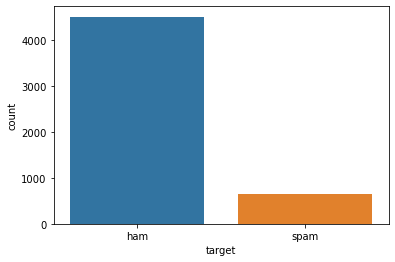

In [19]:
# data is imbalanced

sns.countplot(x=sms_df['target'])
plt.show()

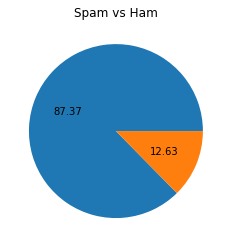

In [20]:
# Calculating individal % of each category of 'Species' column

plt.pie(x=sms_df['target'].value_counts(),autopct='%.2f')
plt.title('Spam vs Ham')
plt.show()

# 5) Feature Encoding
**converting text data into numeric form**

In [21]:
# converting 'spam' as 1 and 'ham' as 0 numeric value
sms_df['target']=sms_df['target'].map({'spam':1,'ham':0})

In [22]:
# after changes
sms_df['target'].unique()

array([0, 1], dtype=int64)

# 6) Text Preprocessing¶
**Steps for pre_processing text data:-**

**1) Convert text into lower_case**

**2) Tokenization :- breaking list into words**

**3) Removing Special Symbols from each word** 

**4) Removing stopwords and punctuation** 

**5) stemming :- Stemming is a technique used to reduce an inflected word down to its word stem.**

In [24]:
# nltk -> natural language tool kit
# PUNKT is an unsupervised trainable model tokenizer
# It tokenizer divides a text into a list of sentences by using an unsupervised algorithm
import nltk


In [26]:
import string

from nltk.corpus import stopwords
#nltk.download('stopwords')




In [27]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [28]:
print(string.punctuation,"\n\n")

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 




In [29]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
def transform_sms(message):
    
    # to convert all characters in lower case
    message=message.lower()
    
    # to break sms record into words
    message=nltk.word_tokenize(message)
    
    # to remove special symbals
    temp=[]
    for i in message:
        if i.isalnum():
            temp.append(i)

    # creating clone of temp
    message=temp[:]   
    
    # clear the temp object
    temp.clear()
    
    # removing stopwords and punctuations
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i)
    
    message=temp[:]
    temp.clear()
    
    # stemming
    for i in message:
        temp.append(ps.stem(i))
    
    
    return " ".join(temp)

In [31]:
# calling function 'transform_sms' by passing 'sms' records

sms_df['sms']=sms_df['sms'].apply(transform_sms)

In [32]:
# after transformation
sms_df.head()

,target,sms
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though


# 7) Converting 'sms' text data into numeric
**Feature encoding on sms_df['sms'] after transformation**

**Using TfidfVectorizer**

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
tfidf=TfidfVectorizer()

In [35]:
# converting into vectors
x=tfidf.fit_transform(sms_df['sms']).toarray()

In [36]:
x.shape

(5169, 6708)

In [37]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
y=sms_df['target'].values

In [39]:
y.shape

(5169,)

# 8) Train Test Split
**A train test split is when you split your data into a training set
and a testing set. The training set is used for training the model,
and the testing set is used to test your model.**

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (4135, 6708)
x_test - >   (1034, 6708)
y_train - >   (4135,)
y_test - >   (1034,)


# 9)Training and Evaluating model
**Apply multiple ml algorithms on data, and check the accuracy and precision of model**

**Logistic Regression**

In [43]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()

In [44]:
# train the model
model_lr.fit(x_train,y_train)

LogisticRegression()

In [45]:
# testing
y_pred_lr=model_lr.predict(x_test)
y_pred_lr

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score,precision_score
print("accuracy score :- ",accuracy_score(y_test,y_pred_lr)*100)
print("precision score :- ",precision_score(y_test,y_pred_lr)*100)

accuracy score :-  94.87427466150871
precision score :-  94.23076923076923


**Random Forest classifier**

In [49]:
from sklearn.ensemble import RandomForestClassifier
# define depth of our decision tree in random forest
model_rf=RandomForestClassifier(max_depth=10, random_state=50)

In [50]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=50)

In [51]:
y_pred_rf=model_rf.predict(x_test)
y_pred_rf

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [52]:
print("accuracy score :- ",accuracy_score(y_test,y_pred_rf))
print("precision score :- ",precision_score(y_test,y_pred_rf))

accuracy score :-  0.8907156673114119
precision score :-  1.0


**Multinomial Naive bayes**

In [53]:
from sklearn.naive_bayes import MultinomialNB
model_mnb=MultinomialNB()
model_mnb.fit(x_train,y_train)

MultinomialNB()

In [54]:
y_pred_mnb=model_mnb.predict(x_test)
y_pred_mnb

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [55]:
print("accuracy score :- ",accuracy_score(y_test,y_pred_mnb))
print("precision score :- ",precision_score(y_test,y_pred_mnb))

accuracy score :-  0.9613152804642167
precision score :-  0.9906542056074766


**Thus , MultinomialNB model perform good for both 'accuracy' and 'precision'
selecting model_mnb**

# 10) Preparing Model for deployment

In [5]:
import pickle

In [ ]:
pickle.dump(model_mnb,open('model.sav','wb'))

In [ ]:
#### Saving the Tfidf Object for vectorizing 'input_sms' (converting text into numeric form) 

pickle.dump(tfidf,open('tfidf_vectorizer.sav','wb'))

In [ ]:
#Checking whether our model working fine or not ??
load_model_mnb=pickle.load(open('model.sav','rb'))
load_tfidf=pickle.load(open('tfidf_vectorizer.sav','rb'))

In [ ]:
input_sms='Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s'

In [ ]:
input_sms=transform_sms(input_sms)

In [ ]:
input_sms

In [ ]:
input_sms=load_tfidf.transform([input_sms])

In [ ]:
pred=load_model_mnb.predict(input_sms)[0]

In [ ]:
pred

In [ ]:
#Deployment code :-
'''
import numpy as np
import pickle
import streamlit as st
import string
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps=PorterStemmer()


# loading our model file (model.sav) into this program
load_model_mnb=pickle.load(open('model.sav','rb'))

# loading tfidf vectorizer object file for text encoding 
load_tfidf=pickle.load(open('tfidf_vectorizer.sav','rb'))

def transform_sms(message):
    
    # to convert all characters in lower case
    message=message.lower()
    
    # to break list into words
    message=nltk.word_tokenize(message)
    # to remove special symbals
    
    temp=[]
    for i in message:
        if i.isalnum():
            temp.append(i)

    message=temp[:]   # create clone of y
    temp.clear()
    
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i)
    
    message=temp[:]
    temp.clear()
    
    for i in message:
        temp.append(ps.stem(i))
    
    return " ".join(temp)

# main() for web app interface and input tasks
def main():
    
    # for wide look 
    st.set_page_config(layout="wide")


    st.markdown(
         f"""
         <style>
         .stApp {{
             background-image: url("https://images.pexels.com/photos/167699/pexels-photo-167699.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1");
             background-attachment: fixed;
             background-size: cover
         }}
         </style>
         """,
         unsafe_allow_html=True
     )
    

    html_temp="""

    <div style="background-color:DarkBlue;padding:10xp">
    <h2 style="color:white;text-align:center;">SMS Spam Detection Model </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)


    input_sms=st.text_area("**Enter the message for testing**")

    # sms transformation 
    input_sms=transform_sms(input_sms)

    # tfidf vectorizzer
    input_sms=load_tfidf.transform([input_sms])

    # prediction using model
    pred=load_model_mnb.predict(input_sms)[0]

    # button for prediction
    if st.button("Predict"):
        if pred == 1:
            st.success("**Spam sms **💬 ")
        else:
            st.success("**Not Spam sms **💬")


if __name__ == '__main__':
    main()



'''